**CUNY DATA 620 Week 8**

**March 27, 2022**

*Bonnie Cooper, George Cruz Deschamps, Rob Hodde*

<br>

**1. Choose a corpus of interest.**  

We will look at the NLTK *text3: The Book of Genesis*.  

We use the NLTK library to access the text:

In [98]:
import nltk
from nltk.book import *
gen_all = text3  #text3 is the King James version of the book of Genesis (Bible)

he joseph pharaoh jacob they abraham she isaac sarah them him it i me
abram laban thee cain esau judah


Since this is a religious text, we are interested in this book's concept of deity, from a machine's point of view. Using the *similar* function, we find the words most similar to "God" in the text:

In [109]:
gen_all.similar("God")  #shows what word means in the text

he joseph pharaoh jacob they abraham she isaac sarah them him it i me
abram laban thee cain esau judah


Of the twenty similar words, nineteen refer to people, as opposed to other lifeforms, or planetary / star structures.  Genesis speaks of people being fashioned in the image of God, but the similarity function suggests that the account may be written in an anthropocentric way.  We could speculate how an android might form an understanding of God through this book. Would they think of God as a kind of super-consciousness surrounding (mostly male) humans? It's interesting to ask if a machine were to be taught the concept of God solely via the Genesis account, would it be a strong example of selection bias?


<br>

**2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, 
defensible way).**

We will remove special characters and insignificant words (stopwords) from the text and then count the number of unique words remaining.

In [108]:

from nltk.corpus import stopwords

gen = [w.lower() for w in gen_all if w.isalpha() and w not in stopwords.words('english')] #remove special characters and numbers
total_words = len(gen)  #get a raw count of significant words in the text
gen_set = set(gen) #creates one copy of each unique word
len(gen_set), total_words  #counts number of unique words vs total words

(2556, 20583)

There are 2,556 significant unique words in the text. These words occur 20,583 times.


<br>

**3. Taking the most common words, how many unique words represent half of the total words in the corpus?**

We will create a Frequency Distribution, then count words starting from the most common, until we reach the half-way point:

In [107]:

fdist = nltk.FreqDist([word for word in gen]) #counts how many times each word occurs in text
df = pd.DataFrame(fdist.most_common(len(gen_set)),columns=['word','count'])  #create a dataframe of the top 2000 words

words = 0
distinct_count = 0
for i in range(len(df)):
    #print(df.iloc[i,0], df.iloc[i,1])
    words += df.iloc[i, 1]
    distinct_count = i
    if words > total_words/2:
        break

print(i, words, total_words) 

83 10304 20583


The eighty-three most common words occur a total of 10,304 times, which is a bit over half of the total occurrences (20583) of significant words. 

<br>

**4. Identify the 200 highest frequency words in this corpus.**

We again use the Frequency Distribution to select the Top 200 most common words, then display them:

In [83]:
import pandas as pd 
pd.options.display.max_rows = 200

#count the number of occurrences of the top 200 words
fdist = nltk.FreqDist([word for word in gen]) #counts how many times each word occurs in text
fdist200 = pd.DataFrame(fdist.most_common(200),columns=['word','count'])  #create a dataframe of the top 200 rows only
fdist200.to_string

<bound method DataFrame.to_string of           word  count
0          and   1250
1         unto    598
2            i    484
3         said    477
4         thou    284
5          thy    278
6        shall    259
7         thee    257
8          god    231
9         lord    207
10      father    198
11        land    184
12       jacob    179
13        came    177
14      joseph    157
15         son    152
16        sons    142
17        upon    140
18     abraham    129
19      behold    118
20         man    115
21       earth    112
22        went    110
23        wife    104
24       years    102
25        name    100
26      called     98
27          ye     96
28         let     93
29          us     93
30       every     91
31     brother     91
32     pharaoh     90
33        also     83
34        hand     82
35        pass     82
36       house     82
37        took     81
38        hath     80
39    brethren     80
40      saying     79
41          go     78
42       isaac   

A truncated list of the most common significant words is listed above. The full list is shown below in the X-Axis labels. 

<br>

**5. Create a graph that shows the relative frequency of these 200 words.**

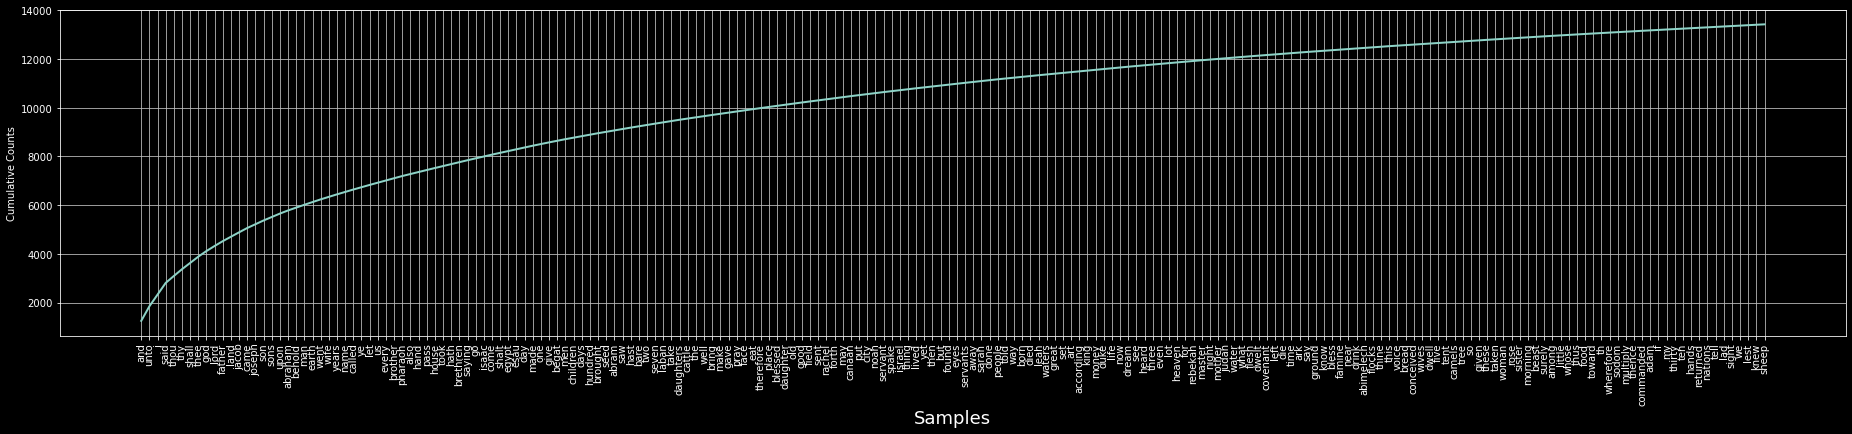

In [85]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
plt.figure(figsize=(32, 6)) 
plt.xlabel('xlabel', fontsize=18)
plt.xticks(fontsize=10)
ax = fdist.plot(200, cumulative=True)

<br>

**6. Does the observed relative frequency of these words follow Zipf’s law? Explain.**

Zipf's law states that for many types of data, the rank-frequency distribution is an inverse relation. (https://en.wikipedia.org/wiki/Zipf%27s_law)

For our data this can be seen as true simply by looking at the chart above: the most frequently-occurring word is ranked number 1, the second-most frequently used word is ranked number 2, and so on.  This is the very definition of a frequency distribution and it cannot be otherwise.

A type of dataset where Zipf's law does not hold is in a binary condition: True/False, Male/Female, On/Off, and so on. 



<br>

**7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”**

We can borrow the "unusual words" function from Chapter 2 of the text to discover something different about this text from "all words in all corpora." 

In [70]:
def unusual_words(text):
    text_vocab  = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

unusual_words(gen)

['abated',
 'abelmizraim',
 'abidah',
 'abimael',
 'abimelech',
 'abr',
 'abrah',
 'accad',
 'achbor',
 'adah',
 'adbeel',
 'admah',
 'aholibamah',
 'ahuzzath',
 'aileth',
 'ajah',
 'allonbachuth',
 'almodad',
 'amal',
 'amalek',
 'amalekites',
 'ammon',
 'amorites',
 'amraphel',
 'anah',
 'anamim',
 'aner',
 'angels',
 'anointedst',
 'anoth',
 'answered',
 'appe',
 'appeared',
 'appointed',
 'aprons',
 'aram',
 'aran',
 'ararat',
 'arbah',
 'archers',
 'ard',
 'areli',
 'arioch',
 'arodi',
 'arphaxad',
 'arrayed',
 'arvadite',
 'asenath',
 'ashbel',
 'ashkenaz',
 'ashteroth',
 'asked',
 'asketh',
 'asses',
 'asshur',
 'asshurim',
 'asswaged',
 'assyr',
 'assyria',
 'atad',
 'attained',
 'avenged',
 'avith',
 'awaked',
 'baalhanan',
 'badest',
 'badne',
 'bak',
 'bakemeats',
 'bakers',
 'bands',
 'barr',
 'bashemath',
 'baskets',
 'beari',
 'beasts',
 'became',
 'beeri',
 'beerlahairoi',
 'beersheba',
 'befell',
 'began',
 'begettest',
 'beguiled',
 'believed',
 'benam',
 'beor',
 'ber

As may be expected, the most striking uniqueness of the Genesis account is in its proper nouns - the names of people and places.  Since the text is over 5,000 years old, we would not expect these names to occur frequently in contemporary corpora.